137
(137, 384) (137, 6)
77


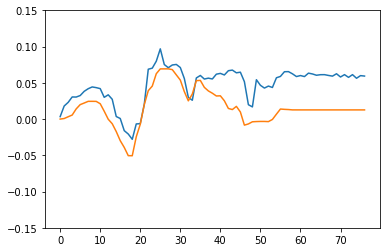

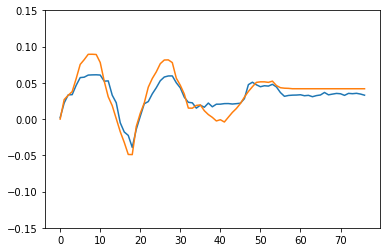

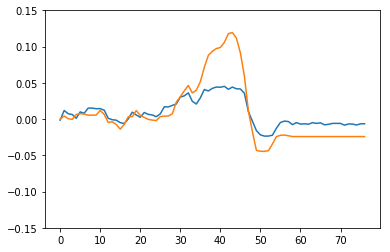

0.159298905689


In [34]:
import os, cv2
import matplotlib.pyplot as plt
import numpy as np

def same_size(X,y):
    minlength = min(y.shape[0],X.shape[0])
    print minlength
    y = y[:minlength]
    X = X[:minlength]
    return X,y

#data = np.load('cloth2/controller/data.npz')
def load_model(pos, feat):
    inds = np.random.choice(a=len(feat),size=5*len(feat))
    if len(inds)%2 == 1:
        inds=inds[:-1]
    nd = len(inds)/2 # number of deltas
    X_train = feat[inds[:nd]] - feat[inds[nd:]]
    y_train = pos[inds[:nd]] - pos[inds[nd:]]
    X_train, y_train = same_size(X_train, y_train)
    print X_train.shape, y_train.shape

    # begin training
    from sklearn import linear_model
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(max_depth=None, random_state=0)
    model = linear_model.Lasso(alpha = 10)
    model.fit(X_train, y_train)
    return model

def load_model_serial(pos,feat):
    nd = 15 # number of deltas
    X_train = feat[:-nd] - feat[nd:]
    y_train = pos[:-nd] - pos[nd:]
    X_train, y_train = same_size(X_train, y_train)
    print X_train.shape, y_train.shape

    # begin training
    from sklearn import linear_model
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(max_depth=None, random_state=0)
    model = linear_model.Lasso(alpha = 10)
    model.fit(X_train, y_train)
    return model

    

def test_model(pos,feat,model,target=0):
    X = feat[:] - feat[target]
    y = pos[:] - pos[target]
    X,y = same_size(X,y)
    #compute the gradient of the feature vector
    y_pred = model.predict(X)
    tt_mse = 0
    #y_pred = uniform_filter1d(y_pred,30)
    for i in range(y_pred.shape[1]-3):
        axes = plt.gca()
        axes.set_ylim([-0.15,0.15])
        plt.plot(range(y_pred.shape[0]),y_pred[:,i])
        plt.plot(range(len(y)),y[:,i])
        plt.show()
        # mean squared error
        mse = sum((y_pred[:,i]-y[:,i])**2)
        tt_mse = tt_mse + mse
    print tt_mse

def same_test():
    data_name = '/home/rmqlife/work/cloth_hri/scripts/data_0815-1735.npz'
    data = np.load(data_name)
    pos = data['pos']
    feat = data['feat']

    split_length = len(pos)*2/3
    model = load_model_serial(pos[:split_length],feat[:split_length])
    test_model(pos[split_length:],feat[split_length:],model)

def diff_test():
    data_name = '/home/rmqlife/work/cloth_hri/scripts/data_0815-1735.npz'
    data = np.load(data_name)
    pos = data['pos']
    feat = data['feat']
    model = load_model(pos,feat)

    data_name = '/home/rmqlife/work/cloth_hri/scripts/data_0815-1740.npz'
    data = np.load(data_name)
    pos = data['pos']
    feat = data['feat']
    test_model(pos,feat,model,target=0)

same_test()